# Pynamical: cobweb plots of the logistic map

**Citation info**: Boeing, G. 2016. "[Visual Analysis of Nonlinear Dynamical Systems: Chaos, Fractals, Self-Similarity and the Limits of Prediction](http://geoffboeing.com/publications/nonlinear-chaos-fractals-prediction/)." *Systems*, 4 (4), 37. doi:10.3390/systems4040037.

Pynamical documentation: http://pynamical.readthedocs.org

### To draw these cobweb plots, pynamical does the following:

1. Let x = 0.5
1. Start on the x-axis at the point (x, 0)
1. Draw a vertical line to the red function curve: this point has the coordinates (x, f(x))
1. Draw a horizontal line from this point to the gray diagonal line: this point has the coordinates (f(x), f(x))
1. Draw a vertical line from this point to the red function curve: this point has the coordinates (f(x), f(f(x)))
1. Repeat steps 4 and 5 recursively one hundred times

### To draw the red function curve and gray diagonal line, pynamical does the following:

Run the logistic map once each for 1000 population values evenly spaced between 0 and 1. This gives us the results of the logistic equation (y values) across the entire range of possible population values (x values). The gray diagonal line is just a plot of y=x.

In [1]:
import glob
import IPython.display as IPdisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pynamical import cobweb_plot
from PIL import Image
%matplotlib inline

## Draw cobweb plots for several values of r

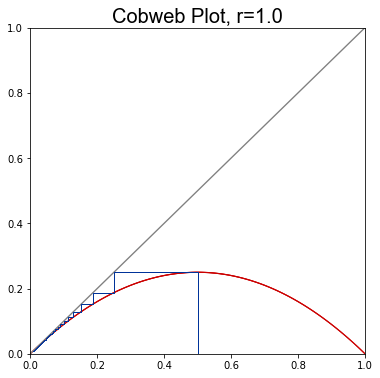

In [2]:
cobweb_plot(r=1.0)

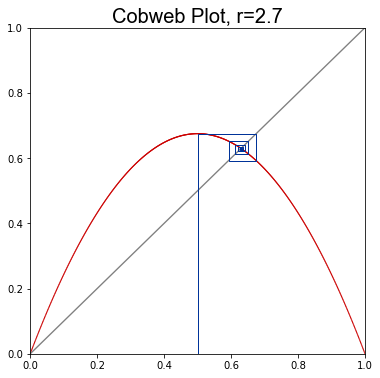

In [3]:
cobweb_plot(r=2.7)

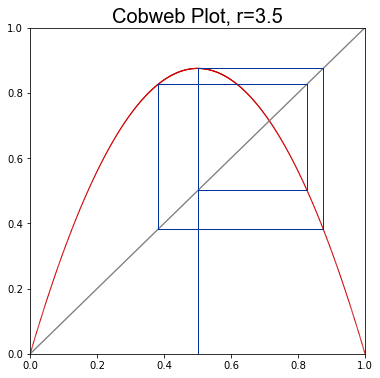

In [4]:
cobweb_plot(r=3.5)

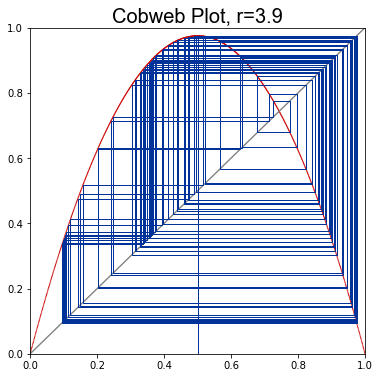

In [5]:
cobweb_plot(r=3.9)

## Demonstrate a basin of attraction with three different initial values and same r

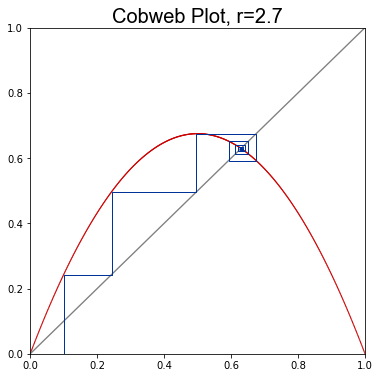

In [6]:
cobweb_plot(r=2.7, cobweb_x=0.1)

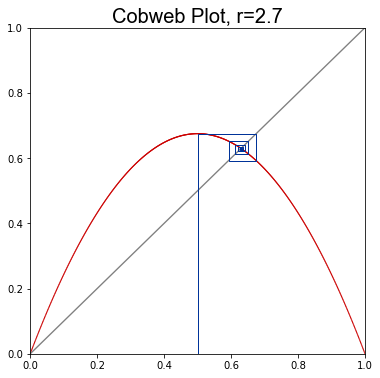

In [7]:
cobweb_plot(r=2.7, cobweb_x=0.5)

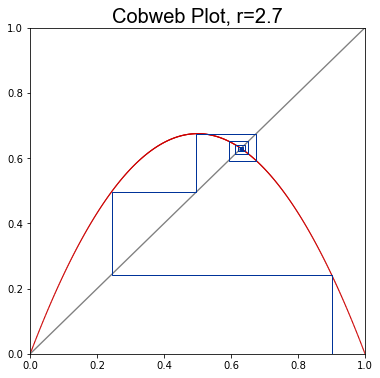

In [8]:
cobweb_plot(r=2.7, cobweb_x=0.9)

## Now animate it

In [9]:
# configure the animation: 70 rates between 0 and 3.999 plus 15 paused frames each at start and end
save_folder = 'images/cobweb-animate'
gif_filepath = 'images/animated-logistic-cobweb.gif'
start_r = 0
end_r = 3.999
steps = 70
rates = np.linspace(start_r, end_r, steps)

In [10]:
# create a plot for each growth rate
for n, r in enumerate(rates):
    filename = '{:03d}'.format(n)
    title = 'Logistic Map Cobweb Plot, r={:.2f}'.format(r)
    cobweb_plot(r=r, filename=filename, folder=save_folder, dpi=90, title=title, show=False)
    plt.close()

In [11]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 10 #show all other frames for 10 ms
durations = tuple([first_last] + [standard_duration] * (len(rates) - 2) + [first_last])

In [12]:
# load all the static images into a list then save as an animated gif
images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(save_folder)))]
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [13]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

True

In [14]:
IPdisplay.Image(url=gif_filepath)

## For more info:
  - [Read the journal article](http://geoffboeing.com/publications/nonlinear-chaos-fractals-prediction/)
  - [Pynamical documentation](http://pynamical.readthedocs.org)
  - [Chaos Theory and the Logistic Map](http://geoffboeing.com/2015/03/chaos-theory-logistic-map/)
  - [Visualizing Chaos and Randomness with Phase Diagrams](http://geoffboeing.com/2015/04/visualizing-chaos-and-randomness/)
  - [Animated 3D Plots in Python](http://geoffboeing.com/2015/04/animated-3d-plots-python/)